In [121]:
import tensorflow as tf
from tensorflow import keras
from scipy.io import loadmat
import os
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from tensorflow.keras import backend as K
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
import seaborn as sns

In [122]:
os.chdir("/Users/michelkauffmann/Downloads")
u = loadmat('u_F_xyz_T1.mat')["u_F"]
v = loadmat('v_F_xyz_T1.mat')["v_F"]
w = loadmat('w_F_xyz_T1.mat')["w_F"]
temp = loadmat('theta_F_xyz_T1.mat')["theta_F"]
tau_11 = loadmat('tau11_xyz_T1.mat')["tau11"]
tau_12 = loadmat('tau12_xyz_T1.mat')["tau12"]
tau_13 = loadmat('tau13_xyz_T1.mat')["tau13"]
tau_22 = loadmat('tau22_xyz_T1.mat')["tau22"]
tau_23 = loadmat('tau23_xyz_T1.mat')["tau23"]
tau_33 = loadmat('tau33_xyz_T1.mat')["tau33"]

/Users/michelkauffmann/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


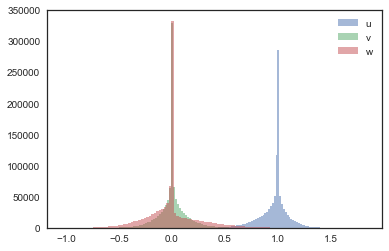

In [123]:
a = u.flatten()
b = v.flatten()
c = w.flatten()
n_bins = 100
fig = plt.figure()
plt.hist(a, bins=n_bins, alpha = 0.5, label = "u")
plt.hist(b, bins=n_bins, alpha = 0.5, label = "v")
plt.hist(c, bins=n_bins, alpha = 0.5, label = "w")
plt.legend()
fig.show()
plt.savefig('input.png', bbox_inches='tight')

/Users/michelkauffmann/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


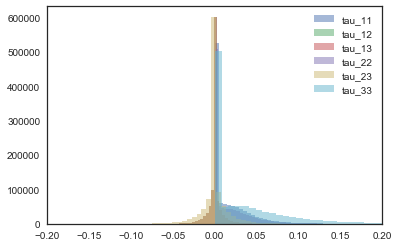

In [124]:
d = tau_11.flatten()
e = tau_12.flatten()
f = tau_12.flatten()
g = tau_22.flatten()
h = tau_23.flatten()
i = tau_33.flatten()
n_bins = 100
fig = plt.figure()
plt.hist(d, bins=n_bins, alpha = 0.5, label = "tau_11")
plt.hist(e, bins=n_bins, alpha = 0.5, label = "tau_12")
plt.hist(f, bins=n_bins, alpha = 0.5, label = "tau_13")
plt.hist(g, bins=n_bins, alpha = 0.5, label = "tau_22")
plt.hist(h, bins=n_bins, alpha = 0.5, label = "tau_23")
plt.hist(i, bins=n_bins, alpha = 0.5, label = "tau_33")
plt.legend()
plt.xlim(-0.2,0.2)
fig.show()
plt.savefig('output.png', bbox_inches='tight')

In [125]:
test = np.column_stack((a, b, c, d, e, f, g, h, i))
test = pd.DataFrame(test, columns = ["u", "v", "w", "tau_11", "tau_12", "tau_13", "tau_22", "tau_23", "tau_33"])
corr = test.corr()
mask =  np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

/Users/michelkauffmann/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


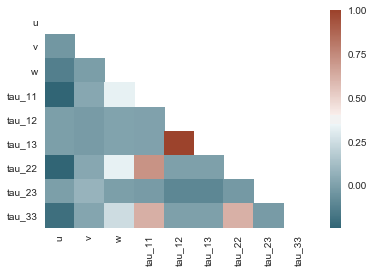

In [126]:
sns.set(style="white")
fig = plt.figure()
cmap = sns.diverging_palette(220, 20, s=75, l=40, n=100, as_cmap=True)
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, cmap = cmap, mask = mask)
fig.show()
plt.savefig('corr.png', bbox_inches='tight')

In [127]:
x = np.array([u, v, w])
x = np.transpose(x, [1, 2, 3, 0])
x = np.reshape(x, (x.shape[0] * x.shape[1] * x.shape[2], x.shape[3]))
x.shape

(1051200, 3)

In [128]:
kmeans = KMeans(n_clusters = 5).fit(x)
labels = kmeans.labels_

/Users/michelkauffmann/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


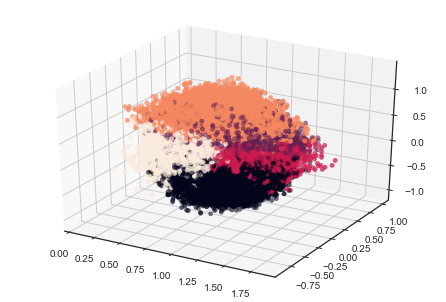

In [129]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], x[:,2], c = labels.astype(np.float))
fig.show()